<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [1]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2026-01-02 00:47:17--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  77.5MB/s    in 2.0s    

2026-01-02 00:47:20 (77.5 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

def to_num(s):
    return pd.to_numeric(s, errors="coerce")

def parse_years(x):
    if pd.isna(x): return np.nan
    if isinstance(x, str):
        t = x.strip().lower()
        if t.startswith("less"): return 0.5
        if t.startswith("more"): return 51.0
        if t in ["none", "nan"]: return np.nan
    return pd.to_numeric(x, errors="coerce")

def parse_age_mid(age):
    if pd.isna(age): return np.nan
    s = str(age)
    m = pd.Series([s]).str.extract(r"(\d+)\s*-\s*(\d+)").astype(float)
    if not m.isna().all(axis=None):
        return float(m.mean(axis=1).iloc[0])
    if "Under" in s: return 16.0
    if "or older" in s: return 70.0
    return np.nan

def explode_multiselect(series: pd.Series) -> pd.Series:
    s = series.dropna().astype(str).str.split(";").explode().str.strip()
    return s[s.ne("")]

# Cleaned df for bar charts
dfc = df.copy()
dfc["AgeNum"] = dfc["Age"].apply(parse_age_mid) if "Age" in dfc.columns else np.nan
dfc["JobSatPoints_6_num"] = to_num(dfc.get("JobSatPoints_6"))
dfc["JobSat_num"] = to_num(dfc.get("JobSat"))
dfc["ConvertedCompYearly_num"] = to_num(dfc.get("ConvertedCompYearly"))
dfc.loc[(dfc["ConvertedCompYearly_num"] <= 0) | (dfc["ConvertedCompYearly_num"] > 5_000_000), "ConvertedCompYearly_num"] = np.nan
dfc["YearsCodePro_num"] = dfc["YearsCodePro"].apply(parse_years) if "YearsCodePro" in dfc.columns else np.nan

print("dfc shape:", dfc.shape)


dfc shape: (65437, 119)


In [4]:
def verify(d, cols, label=""):
    print(f"\n--- VERIFY {label} ---")
    missing = [c for c in cols if c not in d.columns]
    if missing:
        raise KeyError(f"Missing columns: {missing}")
    print("Non-null:\n", d[cols].notna().sum())
    d2 = d.dropna(subset=cols)
    print("Rows after dropna:", len(d2))
    return d2


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



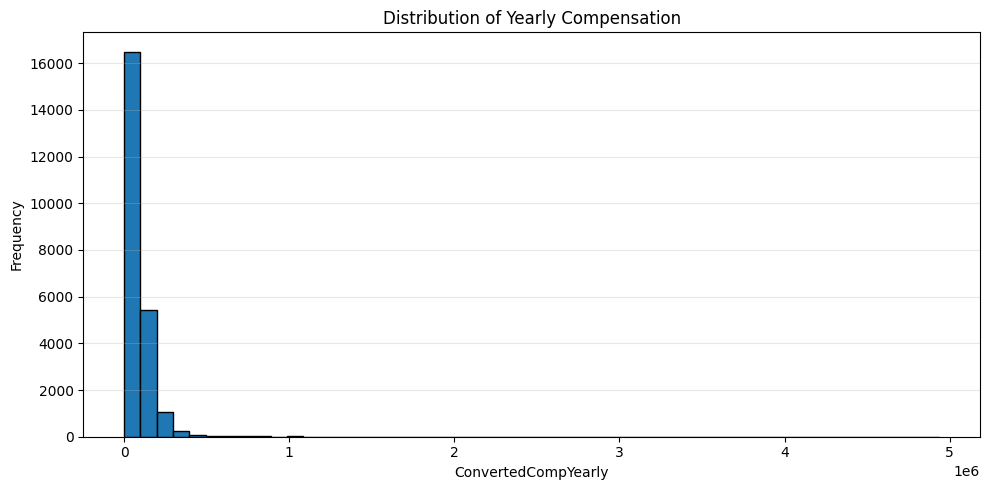

In [8]:
d = dfc.dropna(subset=["ConvertedCompYearly_num"])

plt.figure(figsize=(10,5))
plt.hist(d["ConvertedCompYearly_num"], bins=50, edgecolor="black")
plt.title("Distribution of Yearly Compensation")
plt.xlabel("ConvertedCompYearly")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


Interpretation

The histogram shows a strongly right-skewed distribution. Most respondents earn in the lower-to-mid salary range, while a small number of respondents earn very high salaries.

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



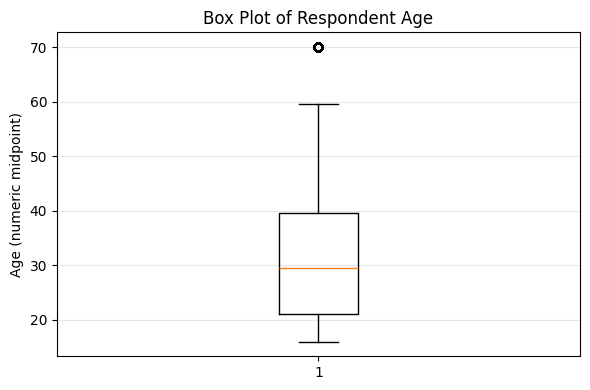

In [9]:
d = dfc.dropna(subset=["AgeNum"])

plt.figure(figsize=(6,4))
plt.boxplot(d["AgeNum"], vert=True, showfliers=True)
plt.title("Box Plot of Respondent Age")
plt.ylabel("Age (numeric midpoint)")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


Interpretation

The box plot shows that the median respondent age is in the early-to-mid 30s, with most respondents falling into the 25–44 age range. There are fewer very young and older respondents, which appear as outliers.

✅ Summary


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



Rows for scatter: 23422
             AgeNum  ConvertedCompYearly_num
count  23422.000000             2.342200e+04
mean      34.208501             8.420822e+04
std        9.901904             1.030197e+05
min       16.000000             1.000000e+00
25%       29.500000             3.270000e+04
50%       29.500000             6.500000e+04
75%       39.500000             1.079370e+05
max       70.000000             4.936778e+06


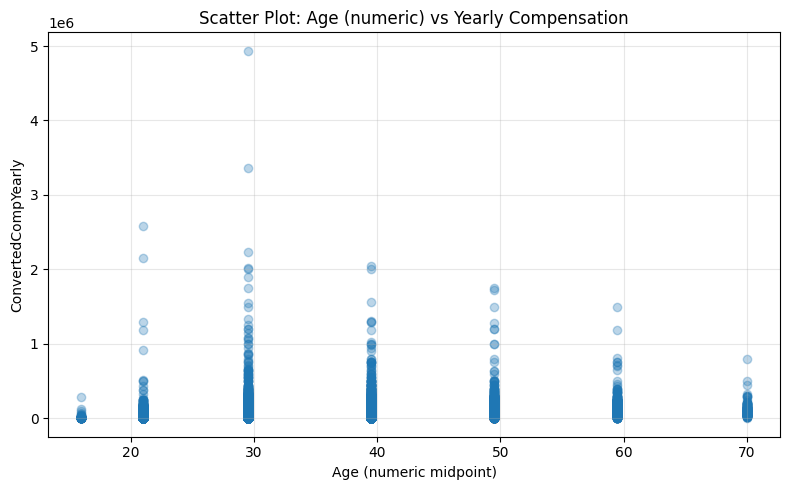

In [5]:
# Keep only rows with valid numeric age + comp
d = dfc.dropna(subset=["AgeNum", "ConvertedCompYearly_num"]).copy()

print("Rows for scatter:", len(d))
print(d[["AgeNum","ConvertedCompYearly_num"]].describe())

plt.figure(figsize=(8,5))
plt.scatter(d["AgeNum"], d["ConvertedCompYearly_num"], alpha=0.3)
plt.title("Scatter Plot: Age (numeric) vs Yearly Compensation")
plt.xlabel("Age (numeric midpoint)")
plt.ylabel("ConvertedCompYearly")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


nterpretation

The scatter plot typically shows a weak-to-moderate upward trend: compensation tends to increase with age, but there is substantial variability at every age. This suggests age (as a proxy for experience) relates to pay, but other factors strongly influence compensation.

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


In [6]:
dfc["JobSatPoints_6_num"] = pd.to_numeric(dfc["JobSatPoints_6"], errors="coerce")
print("Non-null JobSatPoints_6_num:", dfc["JobSatPoints_6_num"].notna().sum())


Non-null JobSatPoints_6_num: 29450


Rows for bubble: 16174


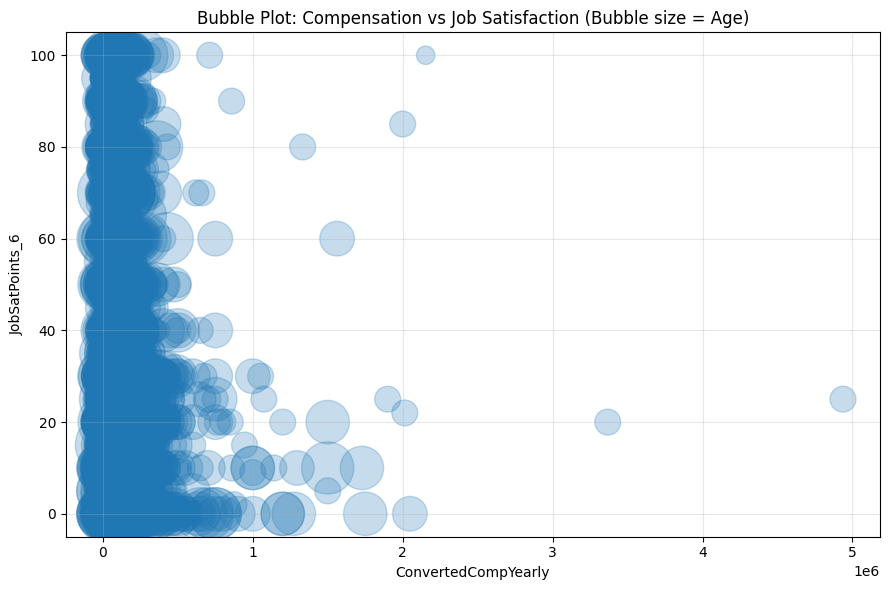

In [7]:
# Keep only valid rows
d = dfc.dropna(subset=["ConvertedCompYearly_num", "JobSatPoints_6_num", "AgeNum"]).copy()

print("Rows for bubble:", len(d))

# Bubble size scaling (prevents bubbles from being huge)
sizes = (d["AgeNum"] ** 2) * 0.4   # adjust scale if needed

plt.figure(figsize=(9,6))
plt.scatter(
    d["ConvertedCompYearly_num"],
    d["JobSatPoints_6_num"],
    s=sizes,
    alpha=0.25
)

plt.title("Bubble Plot: Compensation vs Job Satisfaction (Bubble size = Age)")
plt.xlabel("ConvertedCompYearly")
plt.ylabel("JobSatPoints_6")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Interpretation

This bubble plot shows how compensation relates to job satisfaction while also showing age through bubble size. Often, job satisfaction does not increase proportionally with compensation—many respondents show similar satisfaction scores across a wide range of incomes. Bubble sizes help reveal whether older respondents cluster in higher compensation ranges.

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



In [10]:
## Write your code here
dfc["JobSatPoints_7_num"] = pd.to_numeric(dfc["JobSatPoints_7"], errors="coerce")


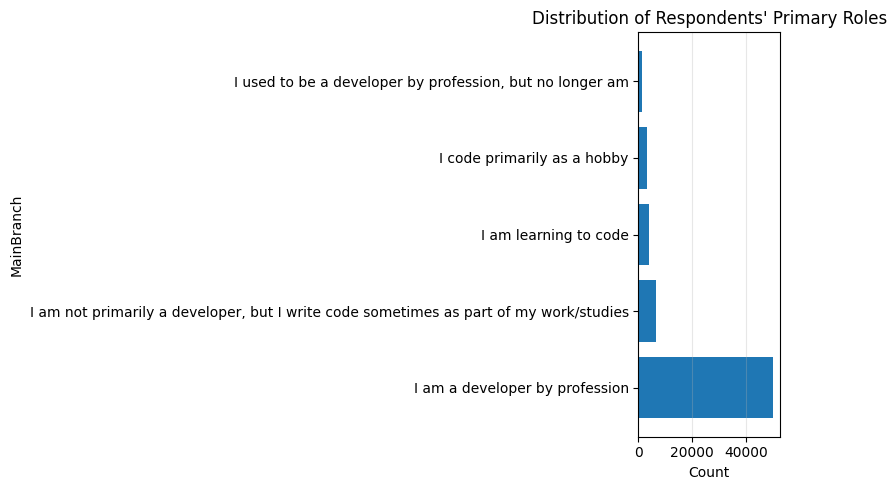

MainBranch
I am a developer by profession                                                           50207
I am not primarily a developer, but I write code sometimes as part of my work/studies     6511
I am learning to code                                                                     3875
I code primarily as a hobby                                                               3334
I used to be a developer by profession, but no longer am                                  1510
Name: count, dtype: int64


In [11]:
d = dfc.dropna(subset=["MainBranch"])
counts = d["MainBranch"].value_counts()

plt.figure(figsize=(8,5))
plt.barh(counts.index, counts.values)
plt.title("Distribution of Respondents' Primary Roles")
plt.xlabel("Count")
plt.ylabel("MainBranch")
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

print(counts)


Interpretation

Most respondents identify primarily as professional developers, with smaller groups consisting of students, hobbyists, and others. This suggests the survey mainly reflects professional perspectives.

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



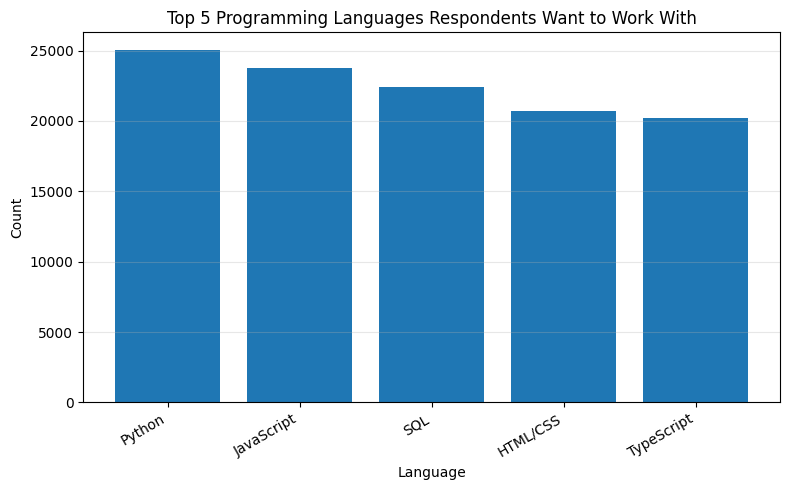

LanguageWantToWorkWith
Python        25047
JavaScript    23774
SQL           22400
HTML/CSS      20721
TypeScript    20239
Name: count, dtype: int64


In [12]:
lang = dfc["LanguageWantToWorkWith"].dropna().astype(str).str.split(";").explode().str.strip()
top5 = lang.value_counts().head(5)

plt.figure(figsize=(8,5))
plt.bar(top5.index, top5.values)
plt.title("Top 5 Programming Languages Respondents Want to Work With")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

print(top5)


Interpretation

A small number of languages dominate respondents’ future learning interests, indicating strong demand for certain technologies in the industry.

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


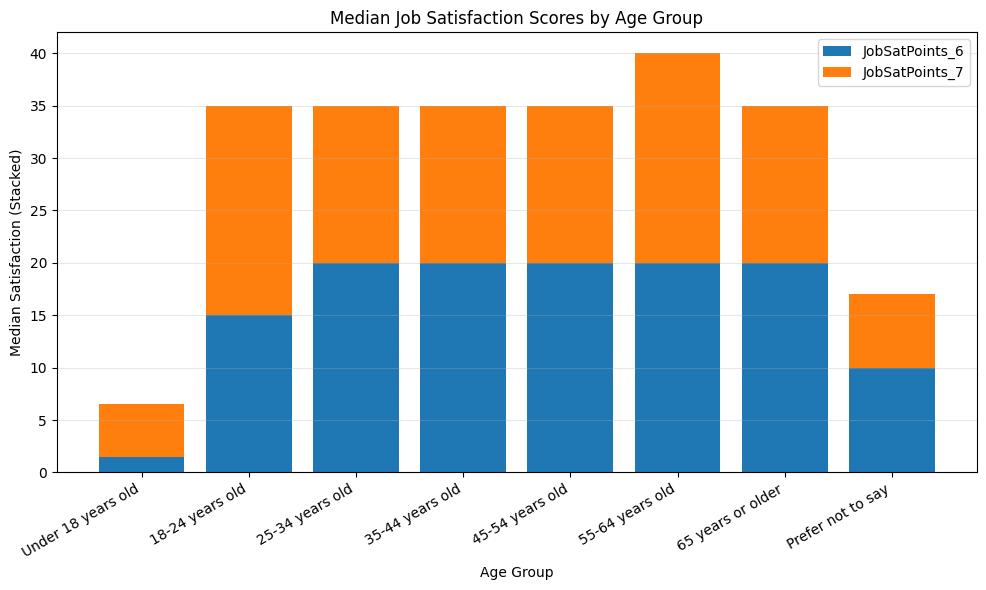

                    JobSatPoints_6_num  JobSatPoints_7_num
Age                                                       
Under 18 years old                 1.5                 5.0
18-24 years old                   15.0                20.0
25-34 years old                   20.0                15.0
35-44 years old                   20.0                15.0
45-54 years old                   20.0                15.0
55-64 years old                   20.0                20.0
65 years or older                 20.0                15.0
Prefer not to say                 10.0                 7.0


In [13]:
d = dfc.dropna(subset=["Age", "JobSatPoints_6_num", "JobSatPoints_7_num"])

med = d.groupby("Age")[["JobSatPoints_6_num", "JobSatPoints_7_num"]].median()

age_order = [
    "Under 18 years old","18-24 years old","25-34 years old","35-44 years old",
    "45-54 years old","55-64 years old","65 years or older","Prefer not to say"
]
med = med.reindex([a for a in age_order if a in med.index])

plt.figure(figsize=(10,6))
plt.bar(med.index, med["JobSatPoints_6_num"], label="JobSatPoints_6")
plt.bar(med.index, med["JobSatPoints_7_num"], bottom=med["JobSatPoints_6_num"], label="JobSatPoints_7")
plt.title("Median Job Satisfaction Scores by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Median Satisfaction (Stacked)")
plt.xticks(rotation=30, ha="right")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

print(med)


Interpretation

Median job satisfaction scores vary slightly across age groups but remain relatively stable overall, suggesting age has only a modest impact on job satisfaction.

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



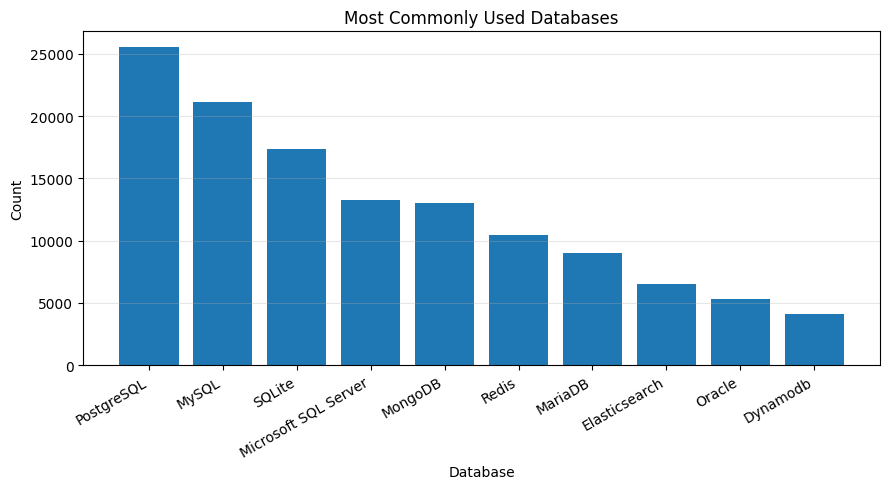

DatabaseHaveWorkedWith
PostgreSQL              25536
MySQL                   21099
SQLite                  17365
Microsoft SQL Server    13275
MongoDB                 13007
Redis                   10463
MariaDB                  8991
Elasticsearch            6533
Oracle                   5273
Dynamodb                 4138
Name: count, dtype: int64


In [14]:
db = dfc["DatabaseHaveWorkedWith"].dropna().astype(str).str.split(";").explode().str.strip()
top_db = db.value_counts().head(10)

plt.figure(figsize=(9,5))
plt.bar(top_db.index, top_db.values)
plt.title("Most Commonly Used Databases")
plt.xlabel("Database")
plt.ylabel("Count")
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

print(top_db)


Interpretation

The chart shows that a few databases are used by a large portion of respondents, reflecting industry standards, while many other databases are used by smaller groups.

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



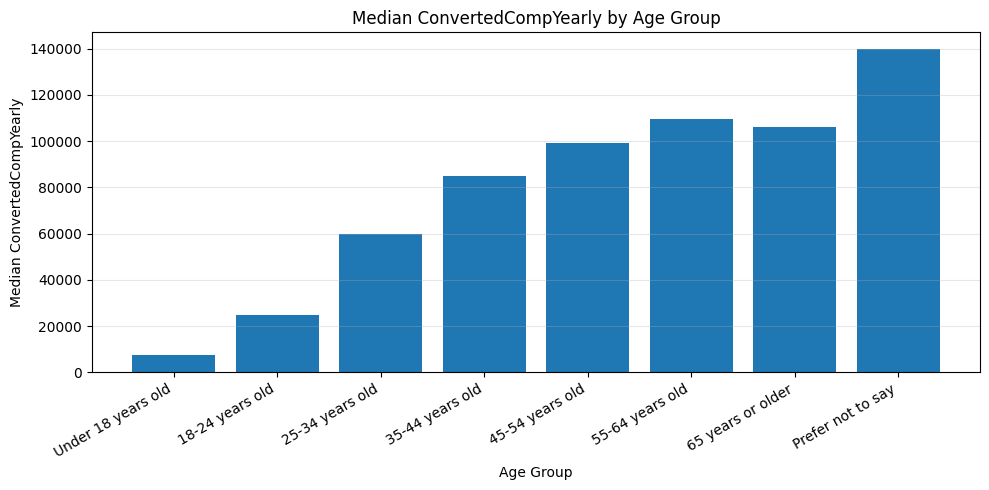

Age
Under 18 years old      7626.5
18-24 years old        25000.0
25-34 years old        59817.0
35-44 years old        84747.0
45-54 years old        99099.0
55-64 years old       109691.0
65 years or older     106000.0
Prefer not to say     140000.0
Name: ConvertedCompYearly_num, dtype: float64


In [15]:
d = dfc.dropna(subset=["Age", "ConvertedCompYearly_num"])

med = d.groupby("Age")["ConvertedCompYearly_num"].median()

age_order = [
    "Under 18 years old","18-24 years old","25-34 years old","35-44 years old",
    "45-54 years old","55-64 years old","65 years or older","Prefer not to say"
]
med = med.reindex([a for a in age_order if a in med.index])

plt.figure(figsize=(10,5))
plt.bar(med.index, med.values)
plt.title("Median ConvertedCompYearly by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Median ConvertedCompYearly")
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

print(med)


Interpretation

Median compensation increases from younger to mid-career age groups and then stabilizes or slightly declines, reflecting typical career earning patterns.

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



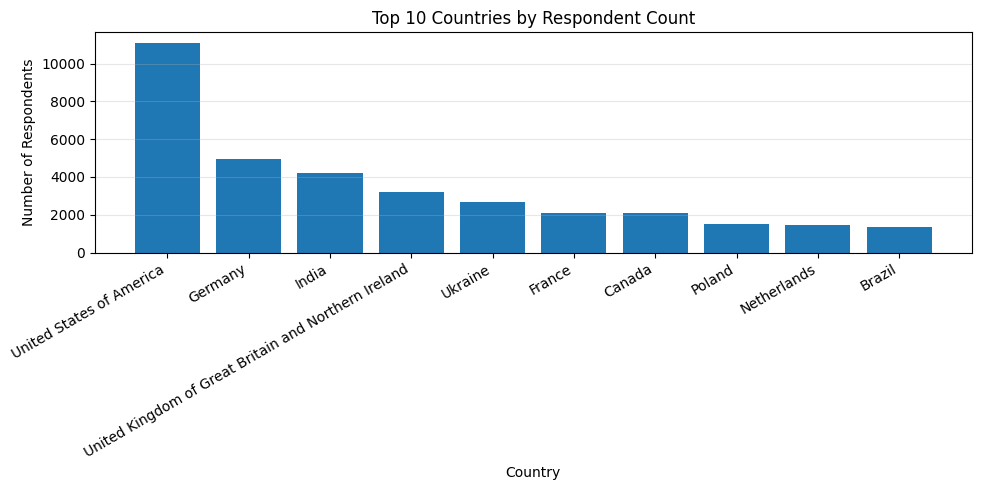

Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
France                                                   2110
Canada                                                   2104
Poland                                                   1534
Netherlands                                              1449
Brazil                                                   1375
Name: count, dtype: int64


In [16]:
d = dfc.dropna(subset=["Country"])

top_countries = d["Country"].value_counts().head(10)

plt.figure(figsize=(10,5))
plt.bar(top_countries.index, top_countries.values)
plt.title("Top 10 Countries by Respondent Count")
plt.xlabel("Country")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

print(top_countries)


Interpretation

A small number of countries account for a large portion of respondents, indicating that participation in the survey is concentrated in certain regions.

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
